In [ ]:
# e.g. if using google colab import drive, uncomment lines below
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install punkt
!pip install gensim
!pip install nltk

ERROR: Could not find a version that satisfies the requirement punkt (from versions: none)
ERROR: No matching distribution found for punkt


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 20.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nltk
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim import corpora, models
import gensim

# Load the data
file_path = '/content/drive/MyDrive/resilience-tech-project/climate_adaptation_solutions.csv'
df = pd.read_csv(file_path)

# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')
from nltk.corpus import stopwords

# Text preprocessing
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]  # Keep only alphanumeric words
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return tokens

# Generate n-grams
def generate_ngrams(texts, n=2):
    all_ngrams = []
    for text in texts:
        tokens = preprocess_text(text)
        n_grams = list(ngrams(tokens, n))
        all_ngrams.extend([' '.join(gram) for gram in n_grams])
    return all_ngrams

# Generate bigrams for the descriptions
descriptions = df['Description'].dropna().tolist()  # Remove any NaN values
bigrams = generate_ngrams(descriptions, n=2)
print("Sample bigrams:", bigrams[:10])  # Display sample bigrams

# Vectorize text for LDA topic modeling
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['Description'].dropna())  # Document-term matrix

# Apply LDA with sklearn
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Set the number of topics
lda_model.fit(dtm)

# Display the top words in each topic
num_words = 10
for index, topic in enumerate(lda_model.components_):
    print(f"Top words for topic #{index}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-num_words:]])

# Topic modeling with Gensim LDA
texts = [preprocess_text(description) for description in descriptions]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA model
lda_gensim = gensim.models.LdaModel(corpus, num_topics=20, id2word=dictionary, passes=15, random_state=42)

# Display the topics
for idx, topic in lda_gensim.print_topics(-1):
    print(f"Topic #{idx + 1}: {topic}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sample bigrams: ['build community', 'community resilience', 'resilience momentum', 'momentum climate', 'climate action', 'action promotes', 'promotes strategies', 'strategies enhance', 'enhance community', 'community preparedness']
Top words for topic #0:
['events', 'management', 'risks', 'city', 'disaster', 'aims', 'risk', 'community', 'climate', 'resilience']
Top words for topic #1:
['improve', 'stormwater', 'green', 'community', 'management', 'city', 'infrastructure', 'flooding', 'water', 'urban']
Top words for topic #2:
['reduce', 'improve', 'initiative', 'resilience', 'flooding', 'infrastructure', 'aims', 'city', 'urban', 'water']
Top words for topic #3:
['weather', 'events', 'energy', 'para', 'flood', 'waste', 'en', 'el', 'water', 'la']
Top words for topic #4:
['island', 'allows', 'making', 'tree', 'extreme', 'flooding', 'city', 'data', 'urban', 'heat']
Topic #1: 0.024*"infrastructure" + 0.023*"climate" + 0.023*"data" + 0.021*"environmental" + 0.018*"public" + 0.018*"planning" + 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sample bigrams: ['build community', 'community resilience', 'resilience momentum', 'momentum climate', 'climate action', 'action promotes', 'promotes strategies', 'strategies enhance', 'enhance community', 'community preparedness']
Top words for topic #1: events, management, risks, city, disaster, aims, risk, community, climate, resilience


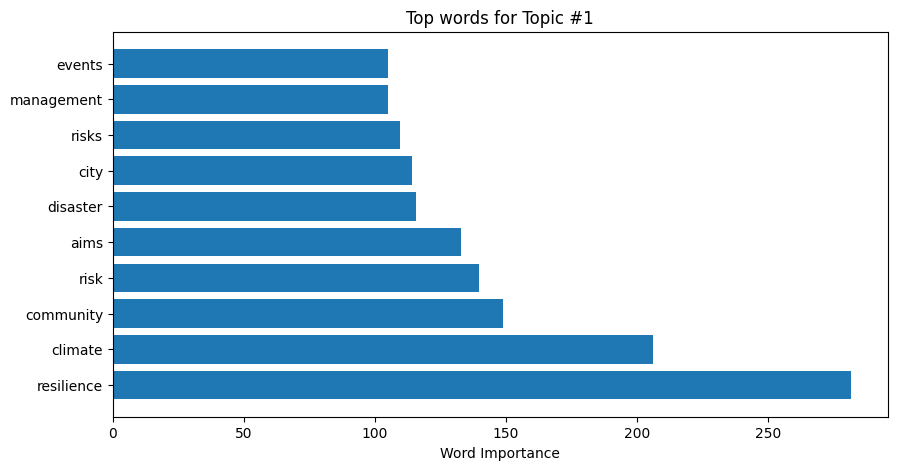

Top words for topic #2: improve, stormwater, green, community, management, city, infrastructure, flooding, water, urban


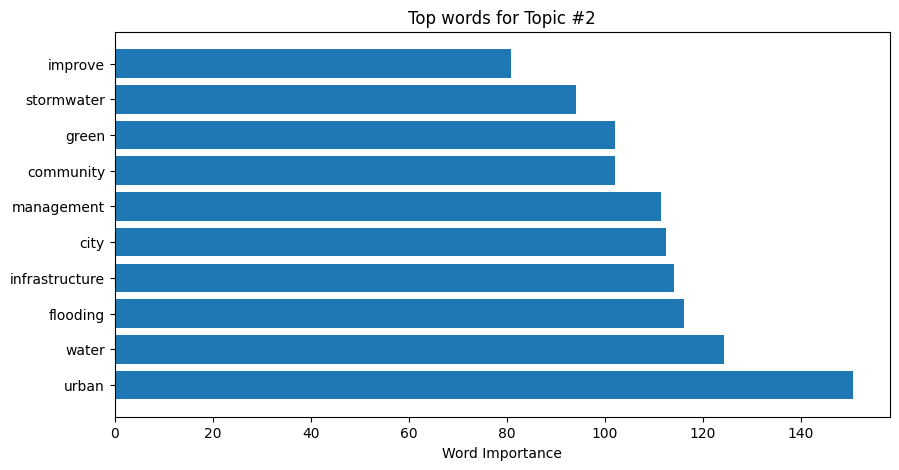

Top words for topic #3: reduce, improve, initiative, resilience, flooding, infrastructure, aims, city, urban, water


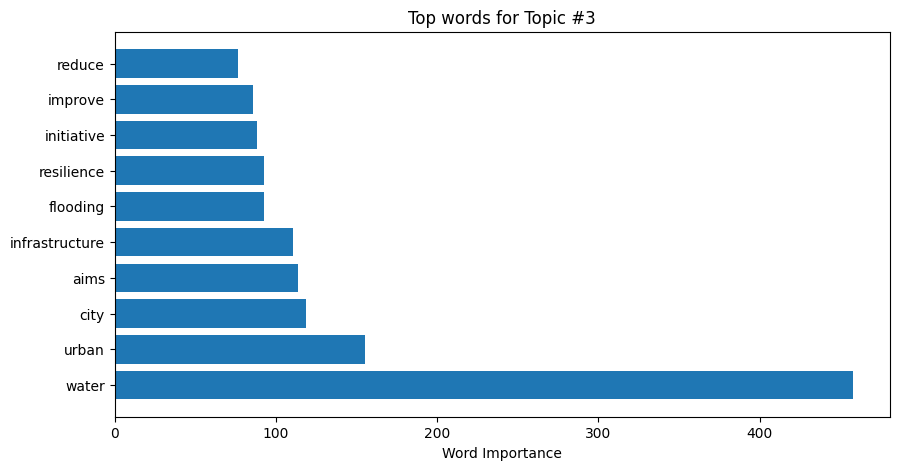

Top words for topic #4: weather, events, energy, para, flood, waste, en, el, water, la


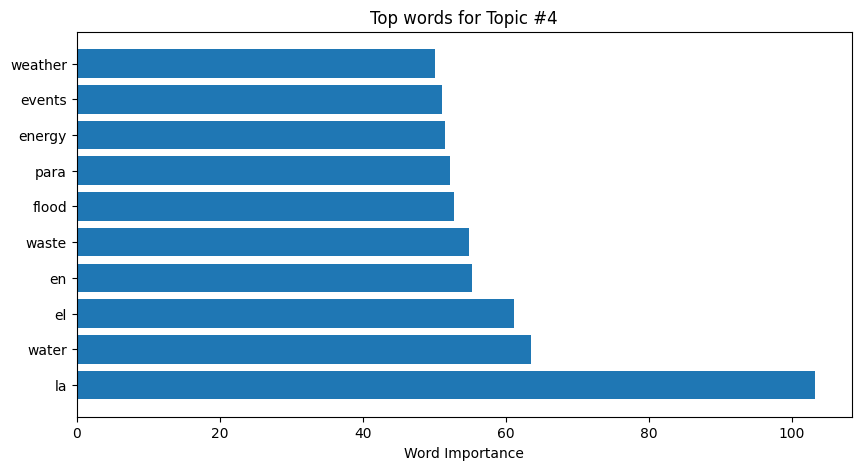

Top words for topic #5: island, allows, making, tree, extreme, flooding, city, data, urban, heat


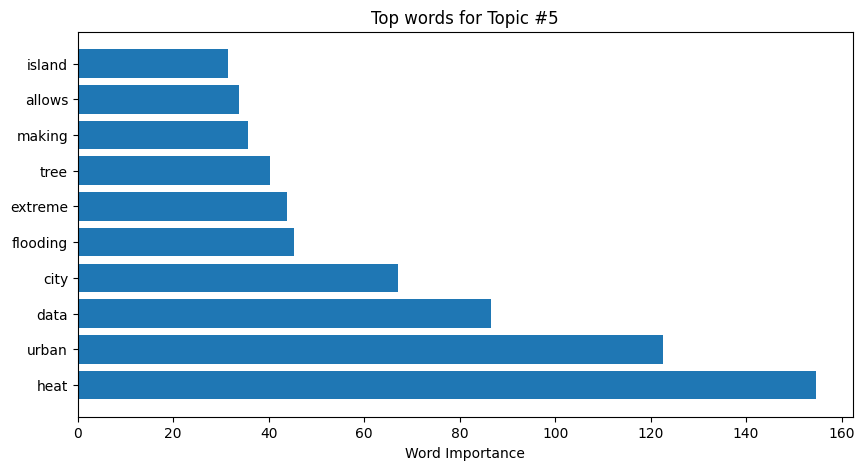


Topics from Gensim LDA:
Topic #1: 0.012*"flood" + 0.010*"aims" + 0.010*"water" + 0.009*"infrastructure" + 0.009*"management" + 0.009*"initiative" + 0.009*"design" + 0.009*"energy" + 0.008*"community" + 0.008*"risk"
Topic #2: 0.026*"urban" + 0.018*"green" + 0.018*"flooding" + 0.016*"resilience" + 0.015*"spaces" + 0.014*"city" + 0.013*"heat" + 0.013*"public" + 0.012*"improve" + 0.011*"reduce"
Topic #3: 0.034*"waste" + 0.019*"management" + 0.015*"de" + 0.014*"water" + 0.013*"initiative" + 0.013*"urban" + 0.011*"system" + 0.011*"aims" + 0.010*"flooding" + 0.010*"wastewater"
Topic #4: 0.013*"aims" + 0.012*"initiative" + 0.010*"improve" + 0.008*"disaster" + 0.008*"respond" + 0.008*"events" + 0.008*"energy" + 0.007*"response" + 0.007*"capacity" + 0.007*"system"
Topic #5: 0.026*"water" + 0.026*"resilience" + 0.017*"city" + 0.013*"aims" + 0.012*"initiative" + 0.009*"urban" + 0.009*"use" + 0.008*"development" + 0.008*"improve" + 0.007*"health"


In [13]:
import pandas as pd
import nltk
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import gensim
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/MyDrive/resilience-tech-project/climate_adaptation_solutions.csv'
df = pd.read_csv(file_path)

# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')
from nltk.corpus import stopwords

# Text preprocessing
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]  # Keep only alphanumeric words
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return tokens

# Generate n-grams
def generate_ngrams(texts, n=2):
    all_ngrams = []
    for text in texts:
        tokens = preprocess_text(text)
        n_grams = list(ngrams(tokens, n))
        all_ngrams.extend([' '.join(gram) for gram in n_grams])
    return all_ngrams

# Generate bigrams for the descriptions
descriptions = df['Description'].dropna().tolist()  # Remove any NaN values
bigrams = generate_ngrams(descriptions, n=2)
print("Sample bigrams:", bigrams[:10])  # Display sample bigrams

# Vectorize text for LDA topic modeling
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['Description'].dropna())  # Document-term matrix

# Apply LDA with sklearn
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Set the number of topics
lda_model.fit(dtm)

# Display the top words in each topic and visualize with Matplotlib
num_words = 10
for index, topic in enumerate(lda_model.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-num_words:]]
    print(f"Top words for topic #{index + 1}: {', '.join(top_words)}")

    # Plot top words for each topic
    plt.figure(figsize=(10, 5))
    plt.barh(top_words, topic[topic.argsort()][-num_words:])
    plt.xlabel("Word Importance")
    plt.title(f"Top words for Topic #{index + 1}")
    plt.gca().invert_yaxis()
    plt.show()

# Topic modeling with Gensim LDA
texts = [preprocess_text(description) for description in descriptions]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA model
lda_gensim = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15, random_state=42)

# Display the topics from Gensim LDA
print("\nTopics from Gensim LDA:")
for idx, topic in lda_gensim.print_topics(-1):
    print(f"Topic #{idx + 1}: {topic}")

# Visualize Gensim LDA model using PyLDAvis
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim.prepare(lda_gensim, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)
